# Ridge & Lasso Regression Using Cosine Curve with Noise 

Ridge and Lasso regression are techniques used for preventing overfitting. Before going into the details, lets try to figure out how exactly can we detect overfitting, which will give us some untuition towards why the Ridge and Lasso models actually work.

Consider a simple scenario of modeling the 'cosine' function. Below I have simulated the cosine function with some noise. We will use this data for further analysis.

## A  cosine simulation for explaining ridge:

### Getting Started
Let's load the required modules first

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 12
import random

### Creating the data:
Here I am going to take a cosine function with angles between 60 and 300 degrees. The corresponding cosine value is modifier with some random noise. The aim is to get as close to the cosine function as possible using regression models.

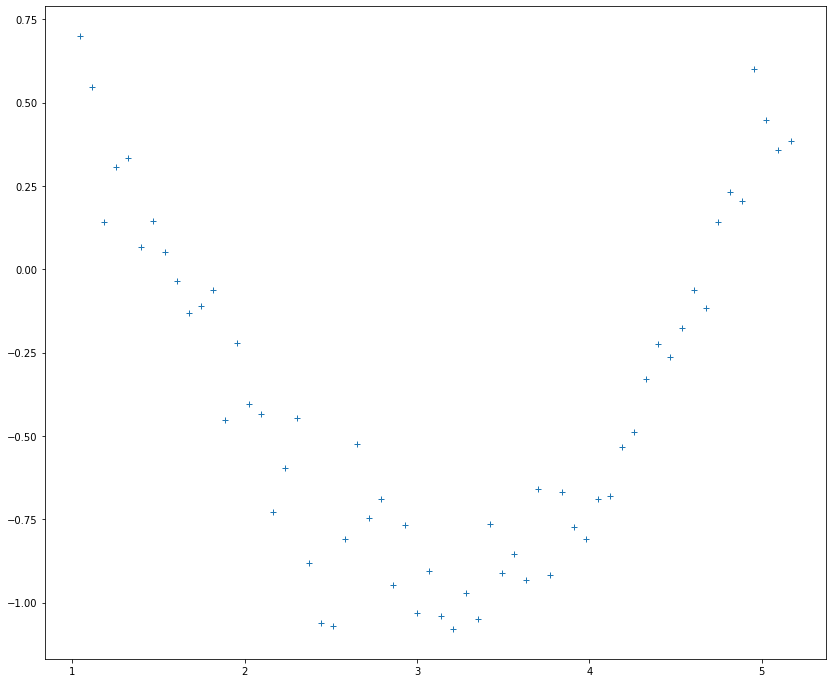

In [2]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.cos(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'+')

In [3]:
data.shape

(60, 2)

## Fitting a simple linear regression:

Lets set the ball rolling by fitting a simple linear regression 

In [4]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

## Determining overfitting:

Create 15 powers:

In [5]:
#Create powers upto 15:
for i in range(2,16):
    colname = 'x_%d'%i
    data[colname] = data['x']**i
print (data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  0.699738  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  0.545663  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.142797  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.307759  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  0.335122  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

Fit a Linear regression model on the 15 powers:

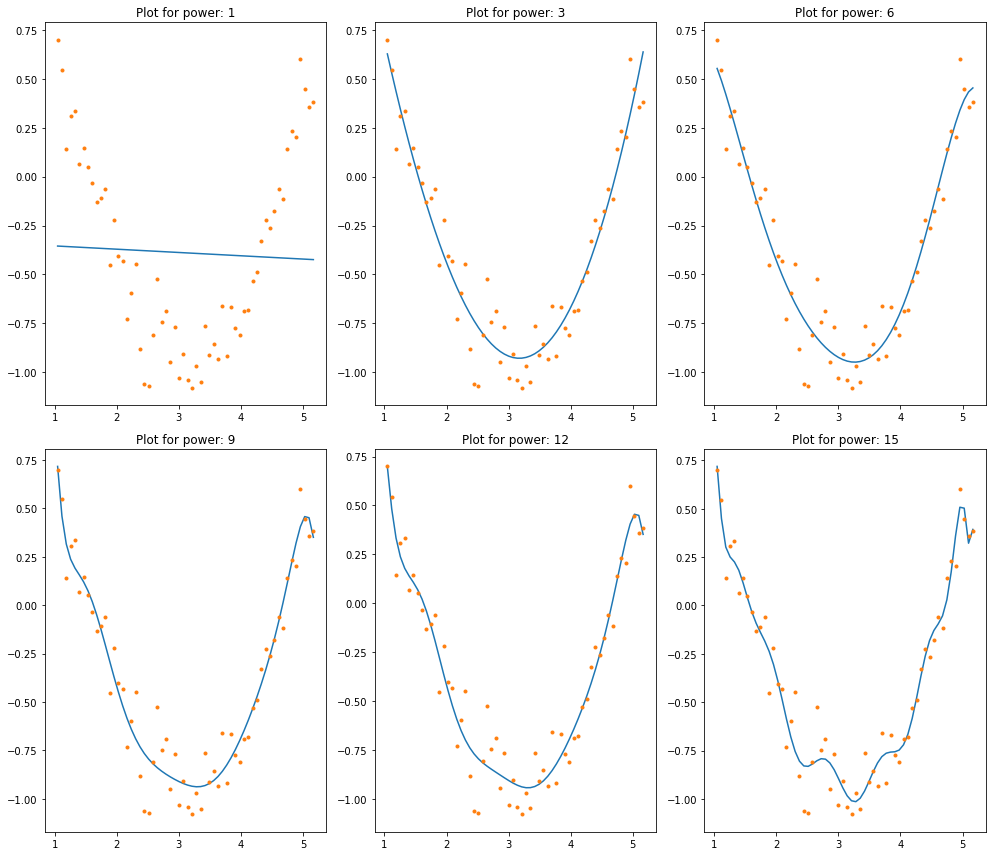

In [6]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [7]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,15,-0.34,-0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,1.1,2.7,-2.3,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,2.4,-2,0.26,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1,1.2,0.07,-0.9,0.28,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3.4,-4.5,2.6,-0.99,0.19,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-1.9,8.8,-10,5.5,-1.5,0.22,-0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,20,-57,69,-45,17,-3.6,0.41,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,44,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.2e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


Though RSS is going down, but the coefficients are increasing in magnitude.

## Ridge Modeling:

In [8]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [9]:
# predictors=['x']
# predictors.extend(['x_%d'%i for i in range(2,16)])
# alp = 1e5
# print ridge_regression(data, predictors, alpha=alp, models_to_plot={alp:111})

/home/suraj/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.46852e-17): result may not be accurate.
  overwrite_a=True).T


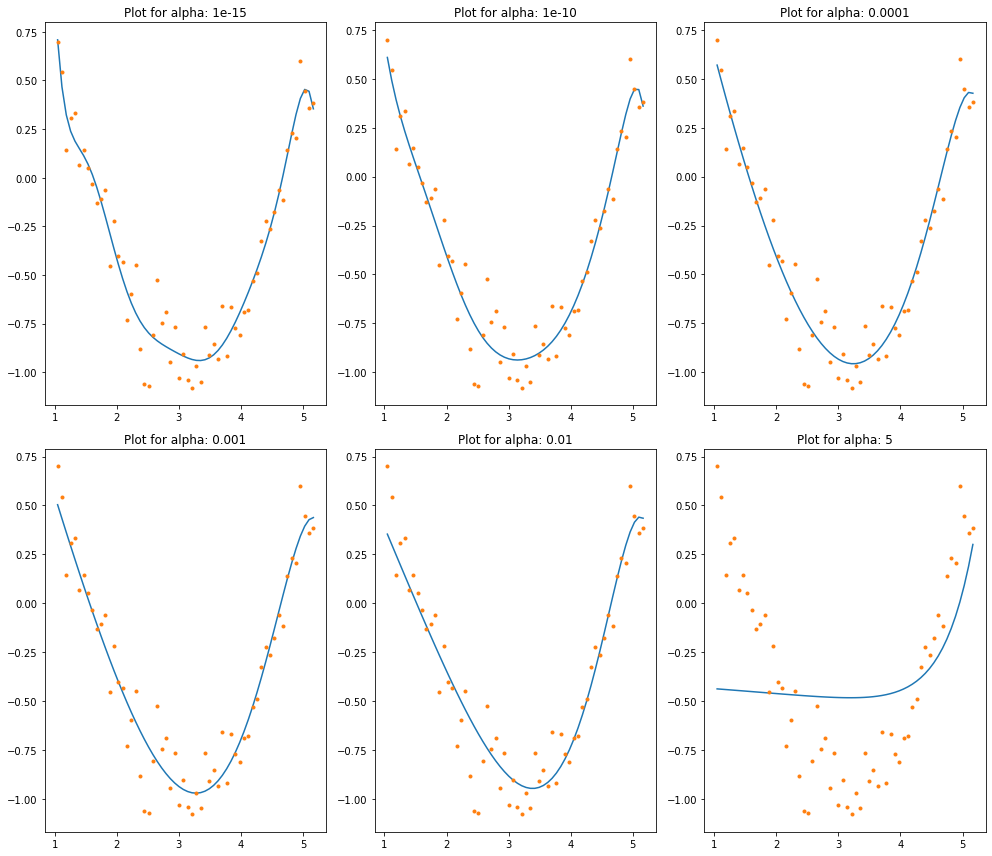

In [9]:
    predictors=['x']
    predictors.extend(['x_%d'%i for i in range(2,16)])

    alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

    col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
    ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
    coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

    models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
    for i in range(10):
        coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [10]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,95,-3e+02,3.8e+02,-2.3e+02,65,0.53,-4.3,0.39,0.2,-0.028,-0.007,0.0012,0.00019,-5.6e-05,4.1e-06,-7.8e-08
alpha_1e-10,0.92,12,-30,30,-15,2.9,0.17,-0.092,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,2.5,-2.8,1.4,-0.52,0.056,0.014,-0.00057,-0.00045,-5.2e-05,2.4e-06,1.6e-06,2.3e-07,1.2e-08,6.1e-10,3.9e-10,-3.6e-10
alpha_0.0001,0.97,2,-1.4,0.057,0.023,0.0029,0.00013,-3.6e-05,-1.1e-05,-1.4e-06,1.7e-08,6.3e-08,2e-08,4e-09,4.3e-10,-6.5e-11,-5.9e-11
alpha_0.001,1,1.6,-1.1,0.0046,0.013,0.0025,0.00036,3.9e-05,3e-06,1.8e-08,-4.8e-08,-1.2e-08,-2.2e-09,-4.3e-10,-1e-10,-3.1e-11,-9.8e-12
alpha_0.01,1.3,1.1,-0.73,-0.025,0.0043,0.0015,0.00033,5.7e-05,8.9e-06,1.2e-06,1.4e-07,1e-08,-1.1e-09,-7.8e-10,-2.5e-10,-6.6e-11,-1.6e-11
alpha_1,7.8,-0.21,-0.09,-0.0076,-0.00051,2.6e-05,2.1e-05,6.3e-06,1.5e-06,3.1e-07,6.4e-08,1.2e-08,2.4e-09,4.5e-10,8.2e-11,1.5e-11,2.7e-12
alpha_5,11,-0.41,-0.021,-0.0016,-4.9e-05,2.7e-05,1.1e-05,2.8e-06,6.6e-07,1.4e-07,3e-08,6.2e-09,1.3e-09,2.5e-10,4.9e-11,9.7e-12,1.9e-12
alpha_10,12,-0.44,-0.0092,-0.00053,3.7e-05,2.8e-05,8.3e-06,2.1e-06,4.7e-07,1e-07,2.1e-08,4.3e-09,8.7e-10,1.7e-10,3.4e-11,6.8e-12,1.3e-12
alpha_20,13,-0.43,-0.0036,-8.1e-05,5.8e-05,2.2e-05,5.9e-06,1.4e-06,3.1e-07,6.6e-08,1.4e-08,2.8e-09,5.6e-10,1.1e-10,2.2e-11,4.4e-12,8.6e-13


In [11]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

## Lasso Modeling:

In [12]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e6)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/home/suraj/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47609969796376306, tolerance: 0.0015002736555987269
  positive)
/home/suraj/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4754969678508595, tolerance: 0.0015002736555987269
  positive)
/home/suraj/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4161164403992112, tolerance: 0.0015002736555987269
  positive)


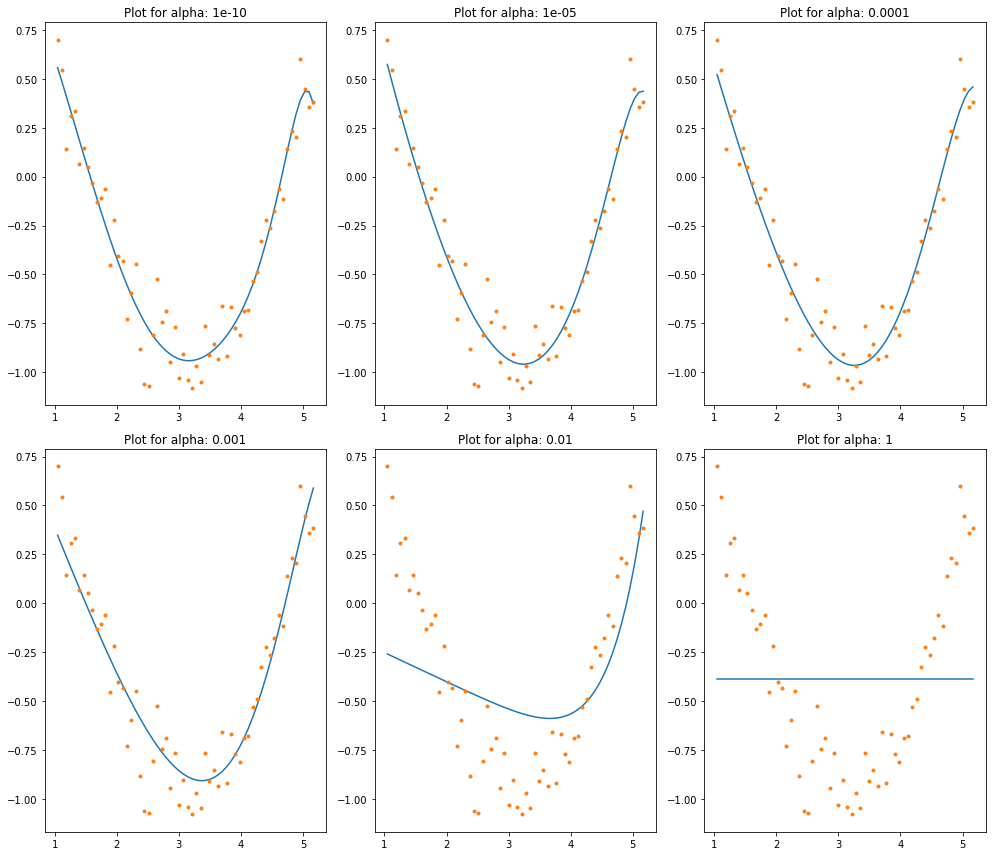

In [13]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [14]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.95,1.3,-0.24,-0.56,0.093,0.019,0.00024,-0.00046,-0.0001,-1.2e-05,9.6e-08,4.1e-07,1.2e-07,2.2e-08,2.4e-09,-2.3e-10,-2.4e-10
alpha_1e-10,0.95,1.3,-0.24,-0.56,0.093,0.019,0.00024,-0.00046,-0.0001,-1.2e-05,9.4e-08,4.1e-07,1.2e-07,2.2e-08,2.4e-09,-2.3e-10,-2.4e-10
alpha_1e-08,0.95,1.3,-0.26,-0.55,0.091,0.019,0.0003,-0.00045,-0.0001,-1.2e-05,-6.3e-08,4.2e-07,1.2e-07,2.2e-08,2.4e-09,-1.8e-10,-2.4e-10
alpha_1e-05,0.98,2,-1.4,0.057,0.033,0,0,-0,-0,0,0,6.8e-08,1e-08,0,0,-0,-3.6e-11
alpha_0.0001,1,1.7,-1.1,0,0.012,0.0055,0,0,0,0,0,-0,-0,-0,-0,-0,-1.9e-11
alpha_0.001,1.4,1.2,-0.8,0,0,0.0025,0.00065,0,0,0,0,-0,-0,-0,-0,-0,-1.3e-11
alpha_0.01,7.5,-0.1,-0.15,-0,0,0,0,0,0,0,5.1e-07,0,0,0,0,0,0
alpha_1,15,-0.39,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_5,15,-0.39,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alpha_10,15,-0.39,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      9
alpha_0.0001    11
alpha_0.001     11
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

## Check correlation:

In [16]:
data.corr()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
x,1,-0.041,0.99,0.95,0.91,0.87,0.84,0.8,0.77,0.75,0.72,0.7,0.68,0.66,0.64,0.62
y,-0.041,1,0.12,0.25,0.35,0.41,0.46,0.49,0.51,0.52,0.53,0.53,0.54,0.53,0.53,0.53
x_2,0.99,0.12,1,0.99,0.97,0.94,0.91,0.88,0.86,0.83,0.81,0.79,0.77,0.75,0.73,0.71
x_3,0.95,0.25,0.99,1,0.99,0.98,0.96,0.94,0.92,0.9,0.87,0.86,0.84,0.82,0.8,0.79
x_4,0.91,0.35,0.97,0.99,1,1,0.98,0.97,0.95,0.94,0.92,0.9,0.89,0.87,0.86,0.84
x_5,0.87,0.41,0.94,0.98,1,1,1,0.99,0.98,0.97,0.95,0.94,0.92,0.91,0.9,0.88
x_6,0.84,0.46,0.91,0.96,0.98,1,1,1,0.99,0.98,0.97,0.96,0.95,0.94,0.93,0.91
x_7,0.8,0.49,0.88,0.94,0.97,0.99,1,1,1,0.99,0.99,0.98,0.97,0.96,0.95,0.94
x_8,0.77,0.51,0.86,0.92,0.95,0.98,0.99,1,1,1,0.99,0.99,0.98,0.97,0.97,0.96
x_9,0.75,0.52,0.83,0.9,0.94,0.97,0.98,0.99,1,1,1,1,0.99,0.99,0.98,0.97
